In [1]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Pandas Demo #2

* This project is the second demonstration of pandas for data manipulation and analysis purposes.
* Heatmaps, histograms, and boxplots are created to analyze temperature data for the city of Philadelphia between 1995 and 2019.

### Step #1 - Loading the dataset

In [2]:
plt.style.use('ggplot')
sns.set_style('whitegrid')

In [16]:
philly_temp_csv_filepath = 'C:/projects/philly_temp_1995_2019.csv'
philly_temp_csv_filepath

'C:/projects/philly_temp_1995_2019.csv'

In [4]:
temp_df = pd.read_csv(philly_temp_csv_filepath)
temp_df

,month,day,1995,1996,1997,1998,1999,2000,2001,2002,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,1,1,41.3,37.8,23.6,23.5,26.3,36.4,27.1,26.9,...,36.4,39.3,46.9,39.9,31.4,33.6,41.7,45.4,12.8,52.6
1,1,2,37.8,36.7,35.9,38.3,16.7,45.9,27.1,28.2,...,30.3,48.9,42.9,32.4,32.9,37.2,37.4,39.0,17.7,42.2
2,1,3,26.8,32.1,48.9,44.3,41.6,57.7,23.2,31.0,...,22.6,34.7,29.7,30.1,19.1,35.0,38.3,42.9,21.7,42.0
3,1,4,31.0,21.8,49.1,51.7,30.8,60.2,28.0,32.9,...,27.2,31.9,20.3,34.2,17.1,46.0,32.8,46.7,25.2,37.8
4,1,5,19.8,23.2,51.1,46.9,21.4,43.3,26.3,35.3,...,27.9,34.3,32.6,35.6,28.4,43.1,19.8,33.3,15.9,44.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,12,27,24.8,39.7,37.3,29.3,34.1,24.9,30.0,34.6,...,24.7,41.4,40.3,34.8,42.4,54.6,54.8,25.3,38.3,45.8
362,12,28,30.0,42.3,34.7,37.5,29.7,26.5,32.8,32.9,...,30.9,45.0,36.7,39.6,46.8,46.2,44.0,18.3,48.8,46.0
363,12,29,30.3,49.8,33.9,38.5,32.2,22.3,36.0,37.8,...,32.3,32.1,33.6,43.5,44.6,46.9,38.2,18.3,50.1,41.8
364,12,30,29.7,46.6,38.0,-99.0,40.2,26.7,27.9,37.1,...,30.8,40.2,35.5,41.6,35.8,48.5,38.1,20.6,39.6,45.0


### Step #2 - Finding the mean temperature for each year in the city of Philadelphia

In [5]:
melted_df = temp_df.melt(id_vars=['month', 'day'], var_name='Year', value_name='Temperature')
melted_df

,month,day,Year,Temperature
0,1,1,1995,41.3
1,1,2,1995,37.8
2,1,3,1995,26.8
3,1,4,1995,31.0
4,1,5,1995,19.8
...,...,...,...,...
9145,12,27,2019,45.8
9146,12,28,2019,46.0
9147,12,29,2019,41.8
9148,12,30,2019,45.0


In [6]:
# mty = mean temperature for each year
mty_df = melted_df.groupby('Year')['Temperature'].mean().reset_index()
mty_df

,Year,Temperature
0,1995,56.408493
1,1996,53.825956
2,1997,54.920822
3,1998,56.803836
4,1999,56.463288
5,2000,54.728689
6,2001,57.059726
7,2002,55.251781
8,2003,54.542740
9,2004,55.506831


### Step #3 - Plotting the mean temperature for each year as a Horizontal Bar Graph using Matplotlib

At this step, we can make our first graph. For this one, I have chosen to create a horizontal bar graph representing the average temperature in the city of Philadelphia for each year between 1995 and 2019. 

(30.0, 60.0)

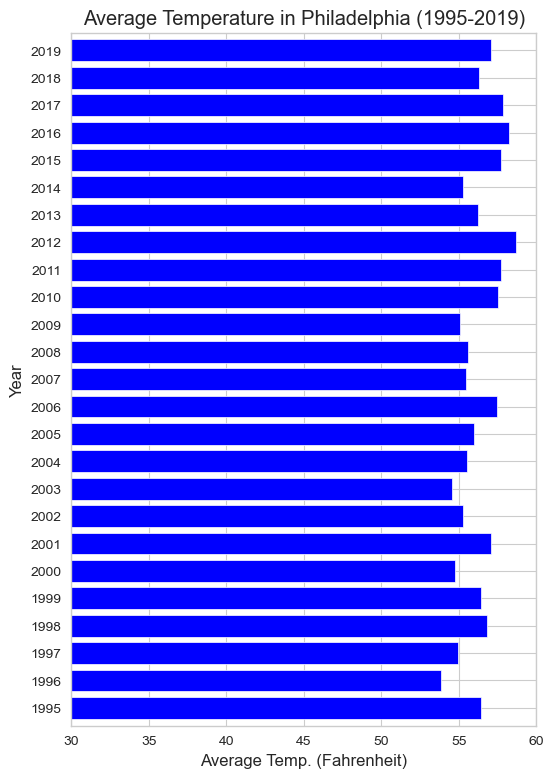

In [7]:
fig, ax = plt.subplots(figsize=(6,9))

mty_df = mty_df.sort_values('Year')

ax.barh(y=mty_df['Year'], 
        width=mty_df['Temperature'], 
        color='blue');

ax.set(ylabel='Year',
       xlabel='Average Temp. (Fahrenheit)',
       title='Average Temperature in Philadelphia (1995-2019)'
      )

ax.margins(y=0.01)
ax.set_xlim(30,60)

### Step #4 - Plotting the mean temperature sorted by month and year as a Heatmap

At this step, we will begin formatting the data into a pivot table in order to use generate a heatmap. Before we can do that, however, we must first use the melt and groupby functions to create a dataframe that sorts mean temperature by month and year. (mym_df)

In [8]:
mym_df = melted_df.groupby(['Year', 'month'])['Temperature'].mean().reset_index()
mym_df

,Year,month,Temperature
0,1995,1,38.100000
1,1995,2,31.478571
2,1995,3,46.848387
3,1995,4,54.406667
4,1995,5,64.306452
...,...,...,...
295,2019,8,76.893548
296,2019,9,71.973333
297,2019,10,61.064516
298,2019,11,43.803333


### Step #5 - Formatting the dataframe into a pivot table

In [9]:
heatmap_data = mym_df.pivot(index='month', columns='Year', values='Temperature')
heatmap_data

Year,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
month,,,,,,,,,,,,,,,,,,,,,
1,38.100000,30.909677,32.358065,41.183871,31.509677,32.296774,32.625806,39.235484,28.683871,26.700000,...,33.135484,30.061290,38.032258,36.625806,28.541935,31.251613,34.383871,38.603226,33.000000,33.974194
2,31.478571,34.337931,40.110714,41.717857,38.014286,37.527586,37.514286,40.967857,30.314286,35.351724,...,32.028571,37.478571,41.210345,35.221429,32.225000,25.975000,38.789655,43.814286,41.710714,36.764286
3,46.848387,38.606452,43.822581,45.438710,42.177419,48.187097,40.929032,45.664516,39.900000,45.151613,...,48.122581,43.954839,51.500000,40.787097,38.587097,39.200000,50.474194,41.890323,39.519355,42.951613
4,54.406667,53.230000,51.153333,55.370000,53.376667,52.403333,54.590000,57.340000,52.163333,54.003333,...,58.263333,56.540000,55.493333,54.803333,53.960000,55.650000,54.643333,59.356667,50.046667,58.530000
5,64.306452,60.041935,59.722581,66.058065,63.632258,64.225806,64.506452,62.909677,60.467742,68.761290,...,67.087097,66.796774,67.570968,64.219355,65.322581,69.712903,62.383871,62.870968,66.912903,65.348387
6,73.626667,72.640000,71.190000,71.523333,72.680000,72.786667,74.903333,50.990000,71.306667,71.500000,...,77.870000,75.596667,73.366667,73.813333,74.266667,74.413333,73.896667,74.590000,72.626667,73.426667
7,80.954839,74.006452,77.419355,77.293548,81.106452,73.638710,75.206452,79.529032,78.535484,76.141935,...,81.674194,82.012903,81.274194,80.270968,77.448387,78.935484,80.332258,78.735484,78.216129,80.054839
8,79.287097,73.948387,73.861290,77.309677,76.890323,73.593548,79.058065,79.251613,77.325806,74.416129,...,78.209677,75.983871,78.054839,74.651613,74.329032,78.716129,80.609677,75.070968,78.316129,76.893548
9,69.573333,68.513333,67.243333,71.936667,69.460000,66.456667,68.343333,66.236667,69.793333,70.146667,...,72.653333,70.576667,70.296667,67.890000,70.103333,73.816667,73.196667,71.026667,71.576667,71.973333


### Step #6 - Using the pivot table to plot the heatmap

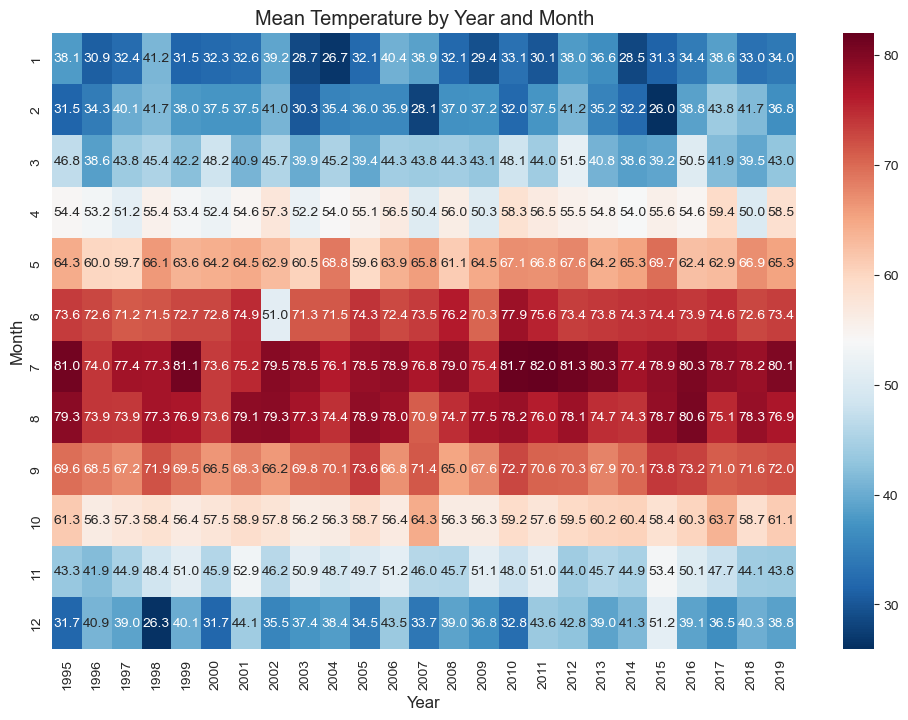

In [10]:
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='RdBu_r')
plt.title('Mean Temperature by Year and Month')
plt.xlabel("Year")
plt.ylabel("Month")
plt.show()

In addition to the one previously shown, there are other styles that can be used for plotting heatmaps with seaborn that can be used to further customize the heatmap to your liking. Here is an example below using the same heatmap_data from the previous one.

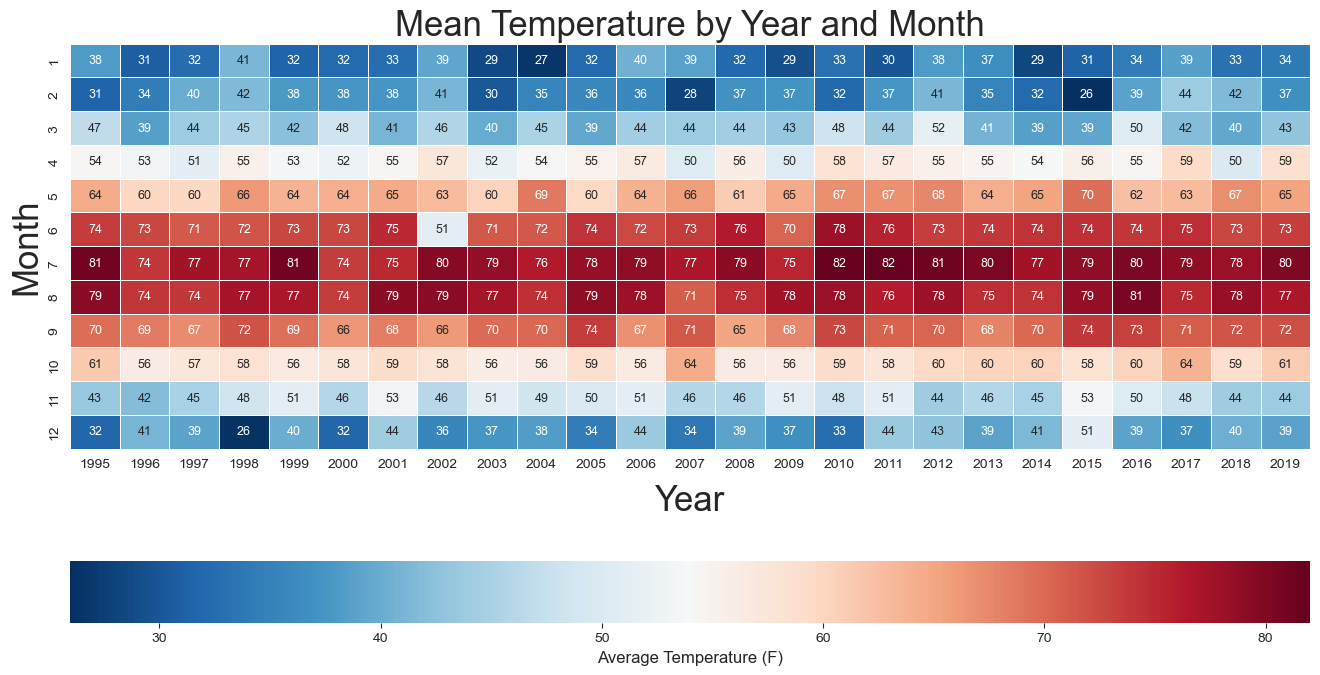

In [11]:
fig, ax = plt.subplots(figsize=(16, 9))
sns.heatmap(heatmap_data, 
            annot=True, 
            linewidths=.5,
            ax=ax, 
            cmap='RdBu_r', 
            cbar_kws={'label': 'Average Temperature (F)', 'use_gridspec': False, 'location': 'bottom'},
            annot_kws={"size": 9}
           )

ax.set_xlabel('Year', fontsize=25, labelpad=10)
ax.set_ylabel('Month', fontsize=25)
ax.set_title('Mean Temperature by Year and Month', fontsize=25)
fig.subplots_adjust(left=0.125, bottom=0.35, right=0.9, top=0.8, wspace=0, hspace=0)

### Step #7 - Plotting histograms of temperature for a single year

For this step, we will be plotting histograms of temperature for a single year, in this case, the year 2010.

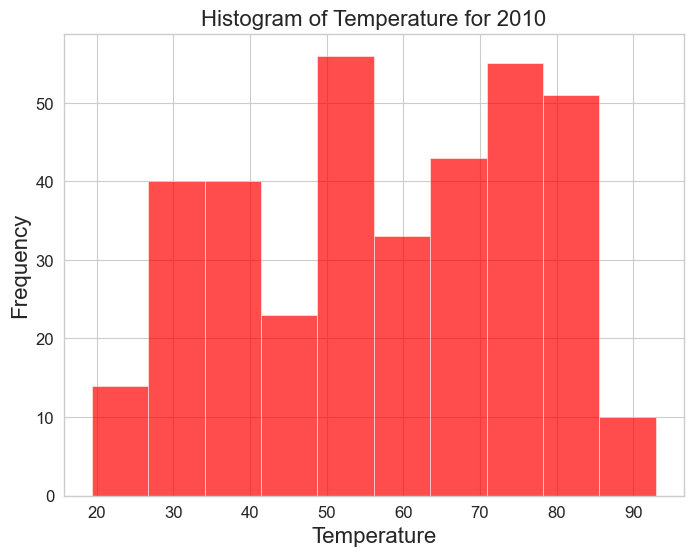

In [12]:
year_2010_data = melted_df[melted_df['Year'] == '2010']
plt.figure(figsize=(8, 6))
plt.hist(year_2010_data['Temperature'], color='red', alpha=0.7)
plt.xlabel('Temperature', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Histogram of Temperature for 2010', fontsize=16)
plt.show()

In addition to the base histogram, we can also create histograms that change the bin width.

For this one, we will create a histogram for the year 2010 with bin width of 10 degrees F.

In [13]:
def give_me_bins(s, increment):

    my_min = s.min()
    my_max = s.max()

    min_for_nice_bins = np.floor(my_min / increment) * increment
    max_for_nice_bins = (np.ceil(my_max / increment) + 1) * increment

    bins = np.arange(min_for_nice_bins, max_for_nice_bins, increment)
    bins
    
    return bins

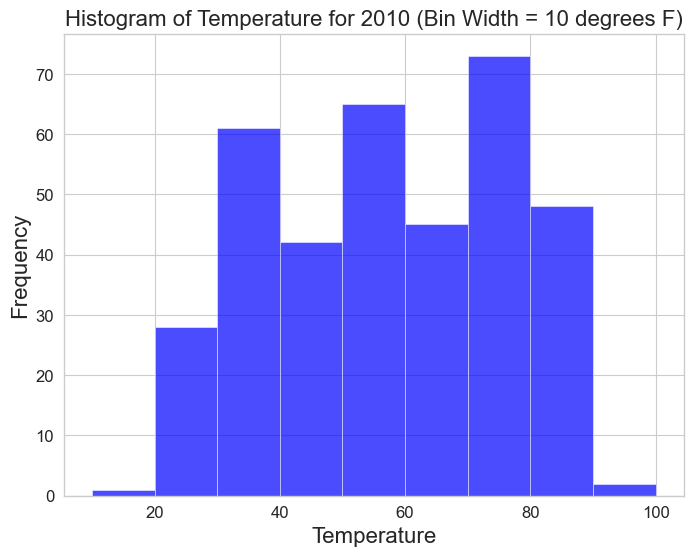

In [14]:
plt.figure(figsize=(8, 6))
plt.hist(year_2010_data['Temperature'],
         bins = give_me_bins(year_2010_data['Temperature'], 10), #bin width of 10 degrees F from give_me_bins function
         color='blue',
         alpha=0.7)
plt.xlabel('Temperature', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.title('Histogram of Temperature for 2010 (Bin Width = 10 degrees F)', fontsize=16)
plt.show()

### Step #8 - Plotting boxplots of temperature for four separate years

Lastly, for this step, we will plot boxplots of temperature for four separate years.

In this case, the years 2000, 2005, 2010, and 2015.

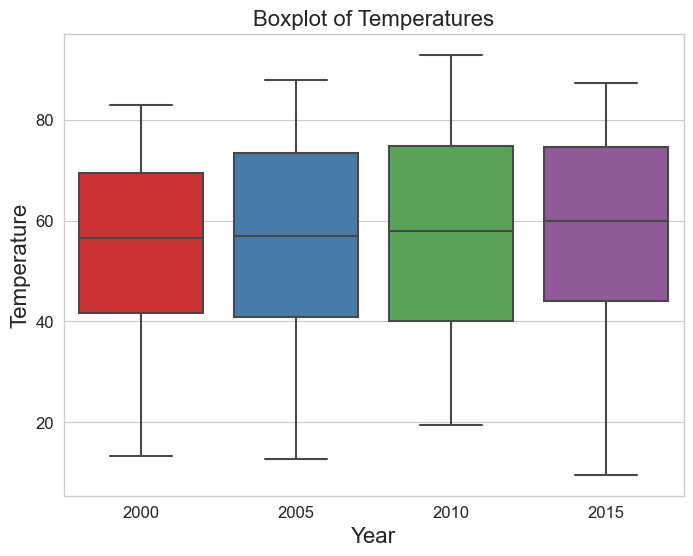

In [15]:
years = ['2000', '2005', '2010', '2015']
melted_df['Year'] = pd.Categorical(melted_df['Year'], categories=years, ordered=True)

plt.figure(figsize=(8, 6))

custom_palette = sns.color_palette("Set1")  # Using the Set1 color palette

sns.boxplot(data=melted_df,
            palette=custom_palette,
            x='Year',
            y='Temperature')

plt.xlabel('Year', fontsize=16)
plt.ylabel('Temperature', fontsize=16)
plt.title('Boxplot of Temperatures', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

### Demo Complete